# Improving Performance of Classifier

## 1. By Using ReLu activation Func
## 2. By Using Batch Normalization
## 3. By Using ADAM Optimizer
## 4. By Using GPU

In [13]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [15]:
def one_hot_embedding(labels, num_classes):
    y = torch.eye(num_classes)
    return y[labels]

In [16]:
def softmax_to_one_hot(tensor):
    max_idx = torch.argmax(tensor, 1, keepdim=True)
    if tensor.is_cuda:
        one_hot = torch.zeros(tensor.shape).cuda()
    else:
        one_hot = torch.zeros(tensor.shape)
    
    one_hot.scatter_(1, max_idx, 1)
    return one_hot
    

In [17]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)


In [18]:
class TwoLayerNet_pytorch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size) -> None:
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.network1 = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.BatchNorm1d(self.hidden_size),
            nn.ReLU(),
        
            nn.Linear(self.hidden_size, self.output_size),
            nn.Softmax()
        )
        
    def forward(self, x):
        y = self.network1(x)
        return y


In [19]:
epochs = 5
learning_rate = 0.01
batch_size = 100
loss_function = nn.BCELoss()

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True
    
)


In [21]:
# net = TwoLayerNet_pytorch(input_size=784, hidden_size=50, output_size=10).cuda() # changed
net = TwoLayerNet_pytorch(input_size=784, hidden_size=50, output_size=10)
net.apply(weight_init)

optimizer = optim.Adam(net.parameters(), lr=learning_rate) # changed
# optimizer = optim.adam(net.parameters(), lr=learning_rate) 

train_loss_list = []
net.train()

for epoch in range(epochs):
    for i, (X, t) in enumerate(train_loader):
        X = X.view(-1, 784)
        t = one_hot_embedding(t, 10)

        Y = net(X)
        loss = loss_function(Y, t)
        
        train_loss_list.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"[{i}/{len(train_loader)}][{epoch}/{epochs}] loss: {loss}")        

torch.Size([100, 10])
[0/600][0/5] loss: 0.35577279329299927


torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
[100/600][0/5] loss: 0.12267881631851196
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])


torch.Size([100, 10])
torch.Size([100, 10])


KeyboardInterrupt: 

In [ ]:
print("calculating accuracy...")
net.eval()

correct = 0

with torch.no_grad():
    for i, (X, t) in enumerate(test_loader):
        X = X.view(-1, 784)
        t = one_hot_embedding(t, 10)
        Y = net(X)
        
        one_hot_y = softmax_to_one_hot(Y)
        correct += int(torch.sum(one_hot_y * t))

print(f"Accuracy: {100. * correct / len(test_loader.dataset)}")
        

calculating accuracy...


Accuracy: 11.35


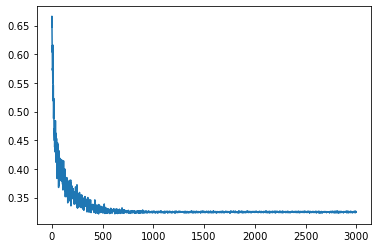

In [43]:
plt.plot(train_loss_list)